In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
%matplotlib inline

E:\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [3]:
train_batchs = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dogs','cats'], batch_size=10)
valid_batchs = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dogs','cats'], batch_size=4)
test_batchs = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dogs','cats'], batch_size=5)

Found 42 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
# taken from: https://github.com/smileservices/keras_utils/blob/master/utils.py

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batchs)

E:\Anaconda3\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


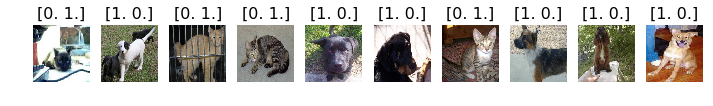

In [6]:
plots (imgs, titles=labels)

# Building and Training CNN

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit_generator(train_batchs, steps_per_epoch=4,
                   validation_data=valid_batchs, validation_steps=4, epochs=10, verbose=2)

Epoch 1/10
 - 4s - loss: 8.6425 - acc: 0.4500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 1s - loss: 6.7696 - acc: 0.5800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 0s - loss: 6.7696 - acc: 0.5800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 0s - loss: 9.3485 - acc: 0.4200 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 0s - loss: 6.3465 - acc: 0.6063 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 0s - loss: 8.4821 - acc: 0.4738 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 0s - loss: 6.8502 - acc: 0.5750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 1s - loss: 8.9052 - acc: 0.4475 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 0s - loss: 9.3485 - acc: 0.4200 - val_loss: 8.0590 - val_acc: 0.5000
